In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut


In [2]:
Stimulus_Subject1 = pd.read_csv('Stimulus_Subject1.csv', header=None)
Stimulus_Subject2 = pd.read_csv('Stimulus_Subject2.csv', header=None)

EEG_Subject1 = pd.read_csv('EEG_Subject1.csv', header=None)
EEG_Subject2 = pd.read_csv('EEG_Subject2.csv', header=None)

In [3]:
fourrier_transform_ranges = {'subject1':[],
                             'subject2':[]}
first = 0
second = 0
for i in range(0, len(Stimulus_Subject1.iloc[0])):
    if Stimulus_Subject1.iloc[0][i] != 0 and first == 0:
        first = i
    if Stimulus_Subject1.iloc[0][i] == 0 and first != 0 and second == 0:
        second = i
        fourrier_transform_ranges['subject1'].append((first, second))
        first = 0
        second = 0
first = 0
second = 0
for i in range(0, len(Stimulus_Subject2.iloc[0])):
    if Stimulus_Subject2.iloc[0][i] != 0 and first == 0:
        first = i
    if Stimulus_Subject2.iloc[0][i] == 0 and first != 0 and second == 0:
        second = i
        fourrier_transform_ranges['subject2'].append((first, second))
        first = 0
        second = 0

In [4]:
average_reference_subject1 = EEG_Subject1.mean(axis=0)
average_reference_subject2 = EEG_Subject2.mean(axis=0)
EEG_after_CAR = {'subject1':EEG_Subject1.subtract(average_reference_subject1, axis=1),
           'subject2':EEG_Subject2.subtract(average_reference_subject2, axis=1)}

In [5]:
def compute_fft(electrode_signal, sample_rate=128):
    N = len(electrode_signal)
    yf = fft(electrode_signal)
    xf = fftfreq(N, 1 / sample_rate)

    xf = xf[:N//2]
    yf = np.abs(yf[:N//2])

    return xf, yf

In [6]:
stimulus_actual_values = {'subject1':[],
                          'subject2':[]}

In [7]:
electrode_O1 = EEG_Subject1.iloc[6, :].to_numpy()
electrode_O2 = EEG_Subject1.iloc[7, :].to_numpy()
electrode_O1_CAR = EEG_after_CAR['subject1'].iloc[6, :].to_numpy()
electrode_O2_CAR = EEG_after_CAR['subject1'].iloc[7, :].to_numpy()
electrode_O1_CAR_subject2 = EEG_after_CAR['subject2'].iloc[6, :].to_numpy()
electrode_O2_CAR_subject2 = EEG_after_CAR['subject2'].iloc[7, :].to_numpy()
subject1_average_CAR = (electrode_O1_CAR + electrode_O2_CAR)/2
subject2_average_CAR = (electrode_O1_CAR_subject2 + electrode_O2_CAR_subject2)/2

freq_ampl_before_CAR = {'O1': [], 'O2': []}
freq_ampl_after_CAR = {'subject1_O1': [], 'subject1_O2': [],'subject2_O1': [], 'subject2_O2': [], 'subject1_average':[], 'subject2_average':[]}

for start, end in fourrier_transform_ranges['subject1']:
    stimulus_actual_values['subject1'].append(Stimulus_Subject1[start][0].tolist())
    stimulus_data_O1 = electrode_O1[start:end]
    stimulus_data_O2 = electrode_O2[start:end]
    stimulus_data_O1_CAR = electrode_O1_CAR[start:end]
    stimulus_data_O2_CAR = electrode_O2_CAR[start:end]
    stimulus_data_average_CAR = subject1_average_CAR[start:end]

    xf_O1, yf_O1 = compute_fft(stimulus_data_O1)
    xf_O2, yf_O2 = compute_fft(stimulus_data_O2)

    xf_O1_CAR, yf_O1_CAR = compute_fft(stimulus_data_O1_CAR)
    xf_O2_CAR, yf_O2_CAR = compute_fft(stimulus_data_O2_CAR)
    xf_average_CAR, yf_average_CAR = compute_fft(stimulus_data_average_CAR)

    freq_ampl_before_CAR['O1'].append((xf_O1, yf_O1))
    freq_ampl_before_CAR['O2'].append((xf_O2, yf_O2))
    freq_ampl_after_CAR['subject1_O1'].append((xf_O1_CAR, yf_O1_CAR))
    freq_ampl_after_CAR['subject1_O2'].append((xf_O2_CAR, yf_O2_CAR))
    freq_ampl_after_CAR['subject1_average'].append((xf_average_CAR, yf_average_CAR))

for start, end in fourrier_transform_ranges['subject2']:
    stimulus_actual_values['subject2'].append(Stimulus_Subject2[start][0].tolist())
    stimulus_data_O1_CAR = electrode_O1_CAR_subject2[start:end]
    stimulus_data_O2_CAR = electrode_O2_CAR_subject2[start:end]
    stimulus_data_average_CAR = subject2_average_CAR[start:end]

    xf_O1_CAR, yf_O1_CAR = compute_fft(stimulus_data_O1_CAR)
    xf_O2_CAR, yf_O2_CAR = compute_fft(stimulus_data_O2_CAR)
    xf_average_CAR, yf_average_CAR = compute_fft(stimulus_data_average_CAR)

    freq_ampl_after_CAR['subject2_O1'].append((xf_O1_CAR, yf_O1_CAR))
    freq_ampl_after_CAR['subject2_O2'].append((xf_O2_CAR, yf_O2_CAR))
    freq_ampl_after_CAR['subject2_average'].append((xf_average_CAR, yf_average_CAR))

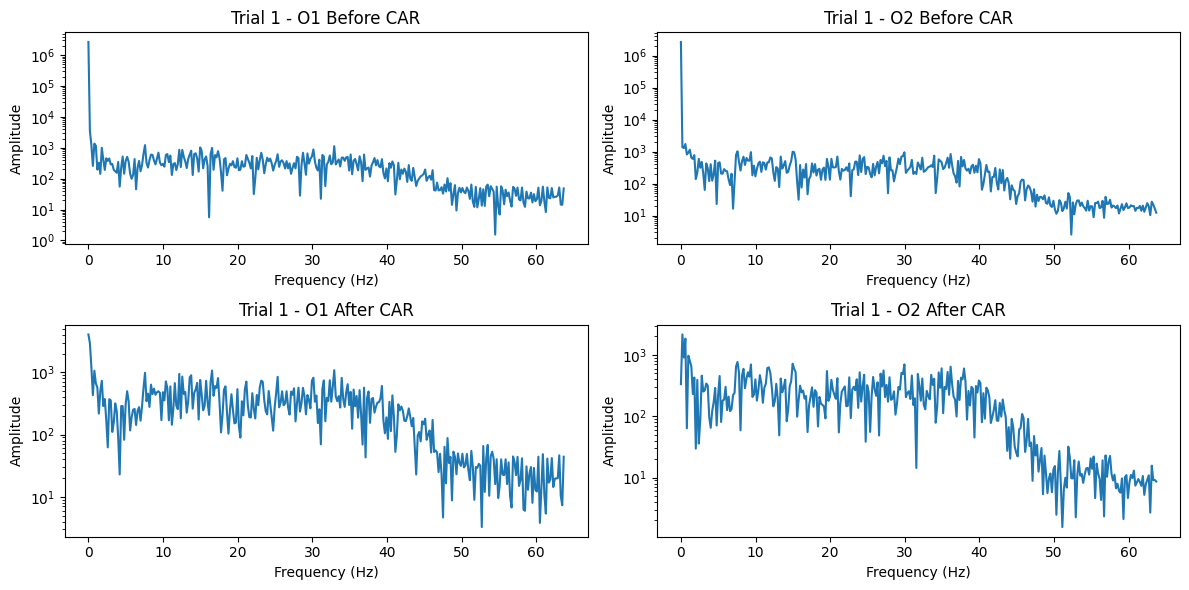

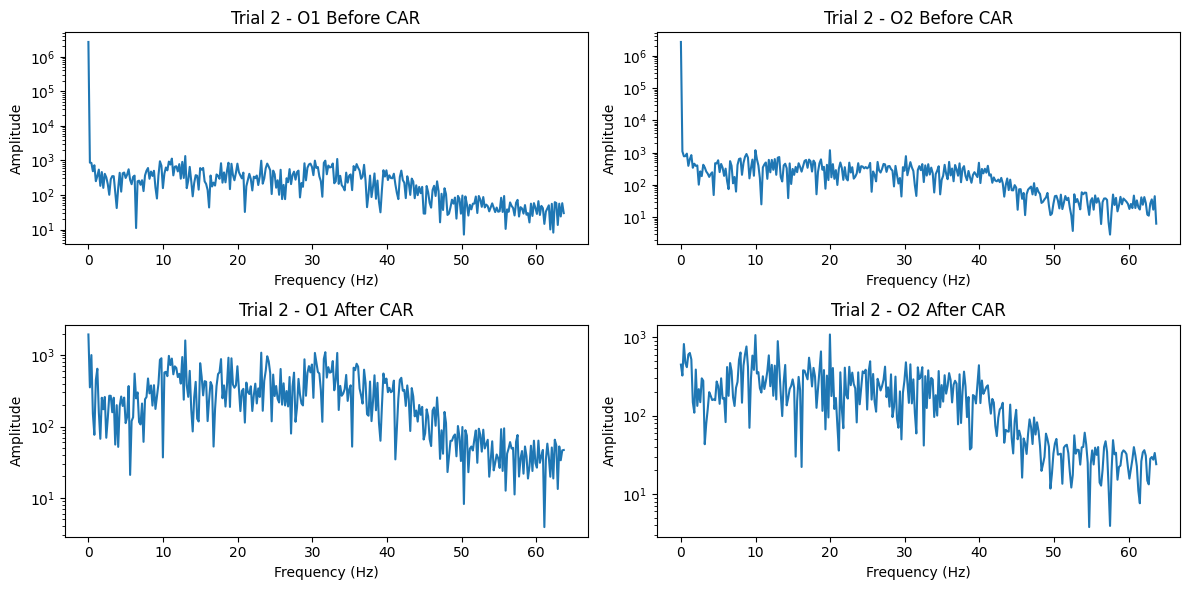

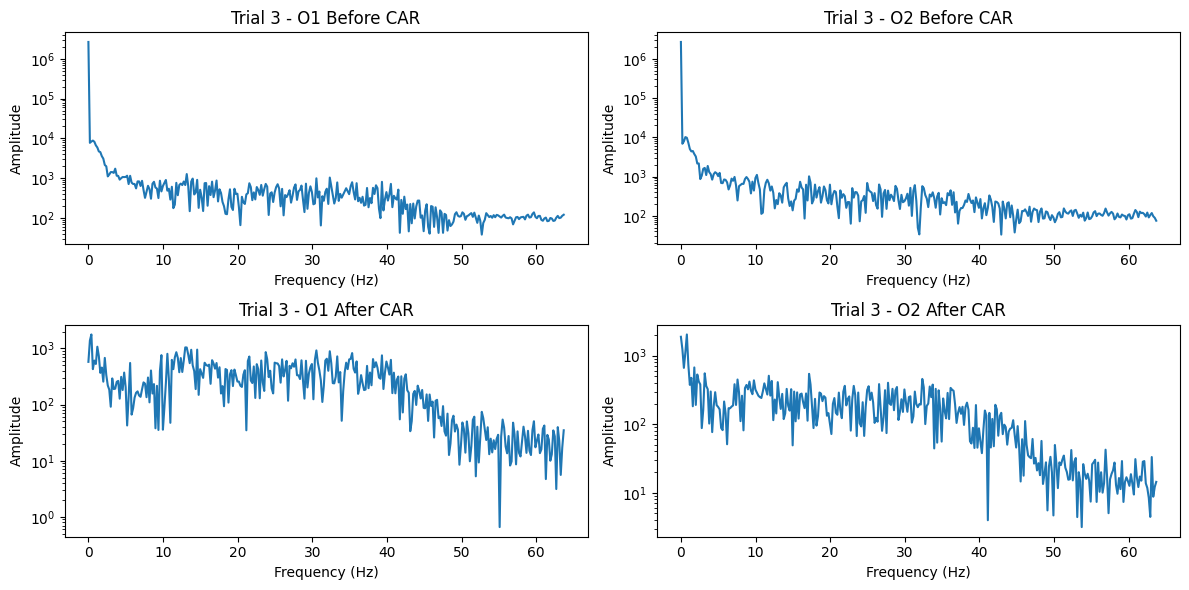

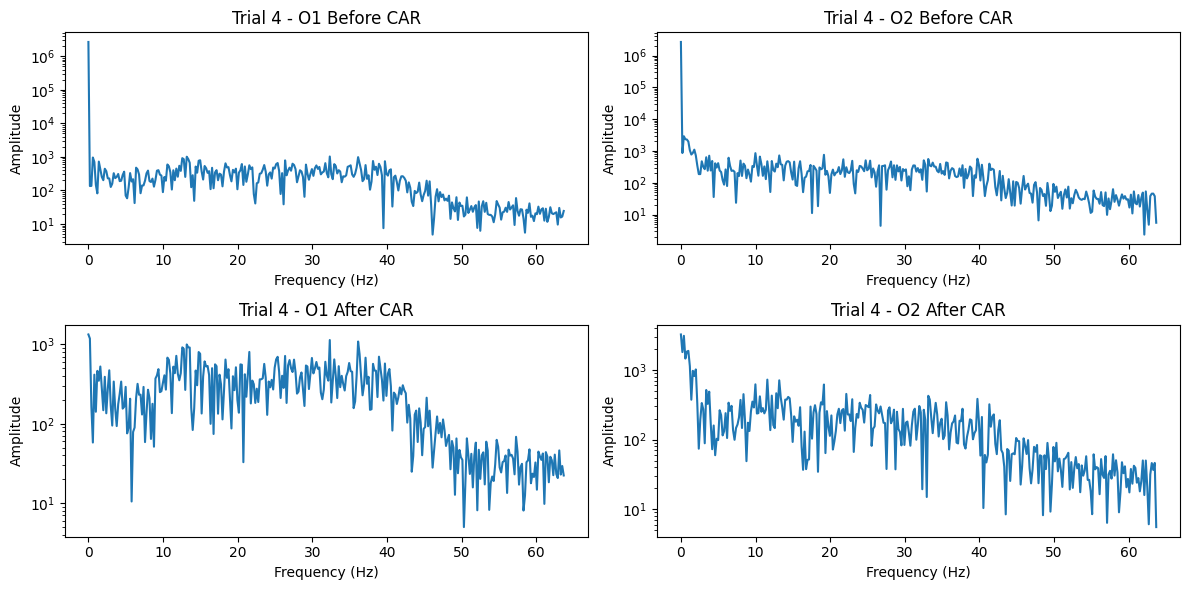

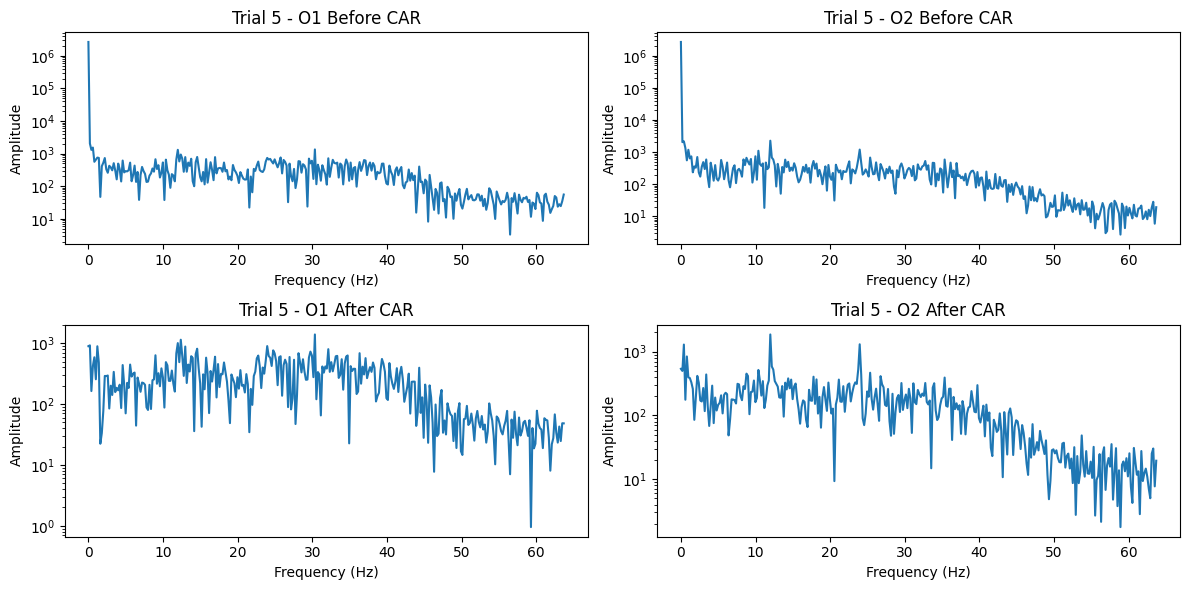

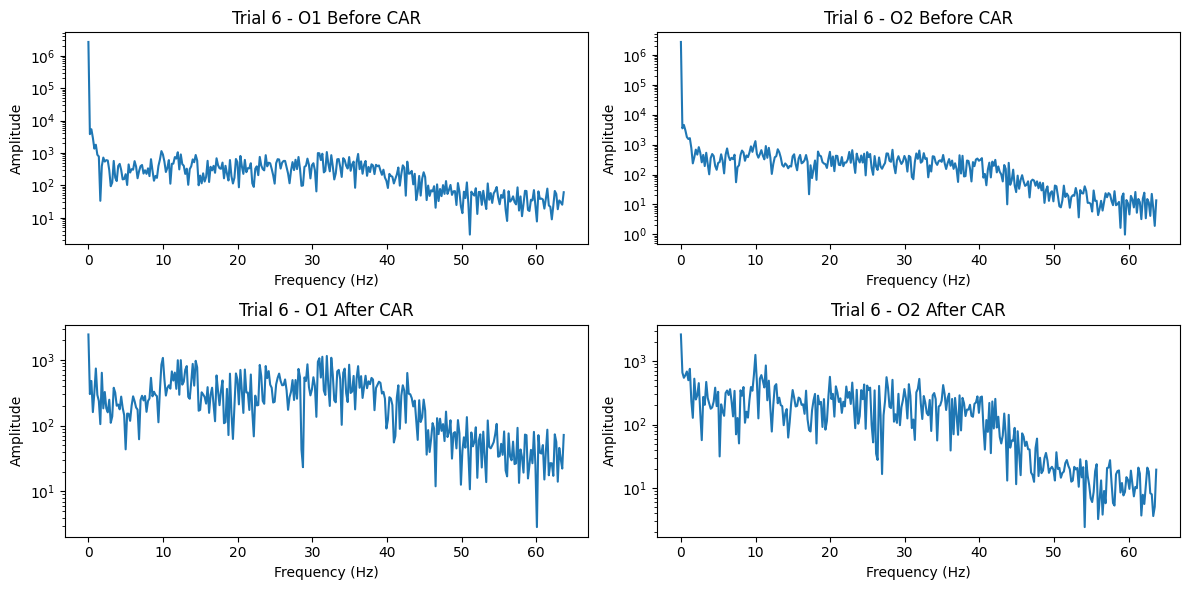

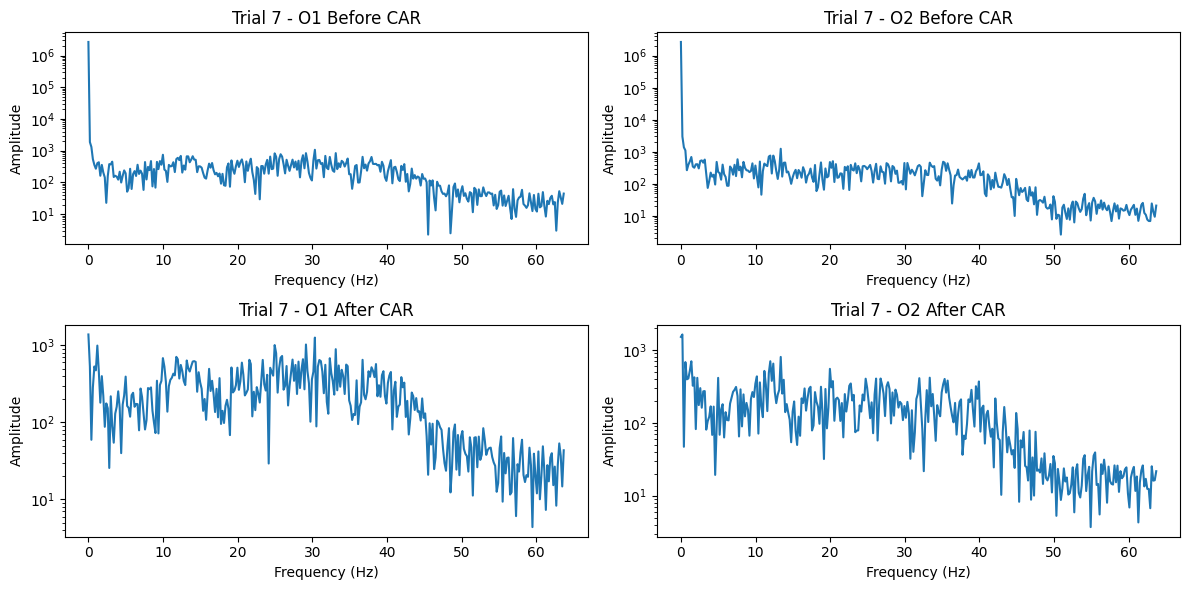

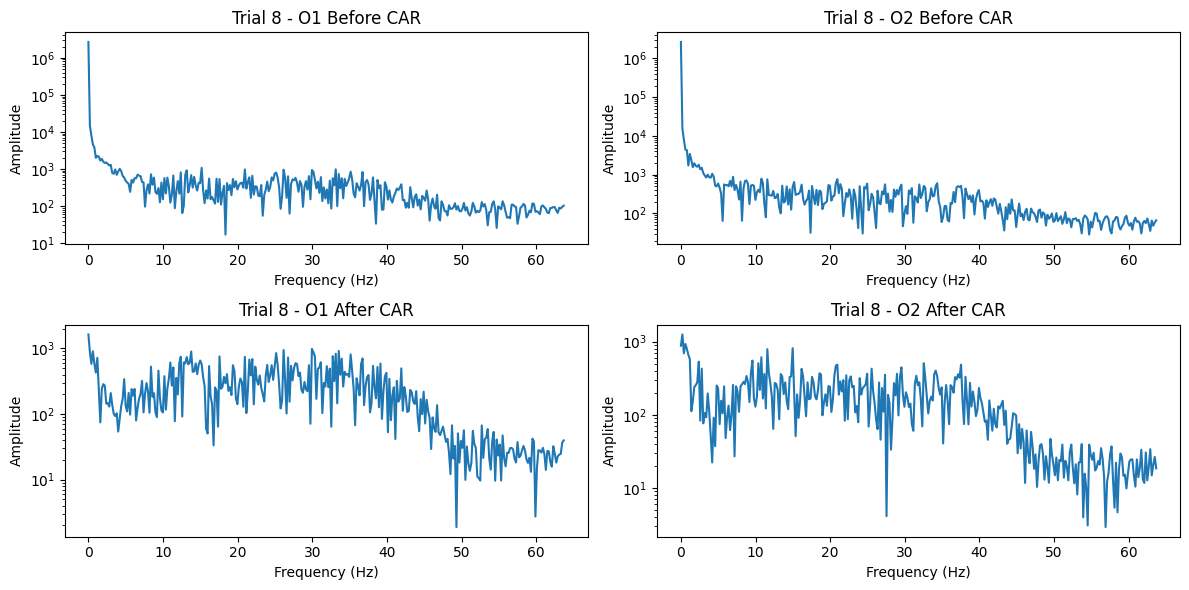

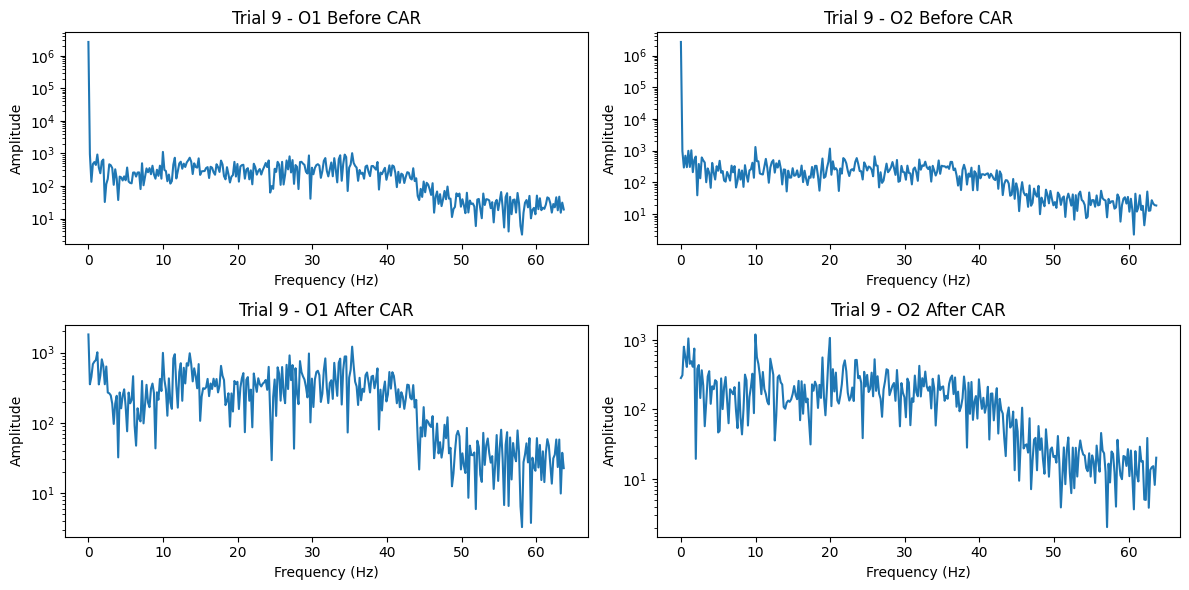

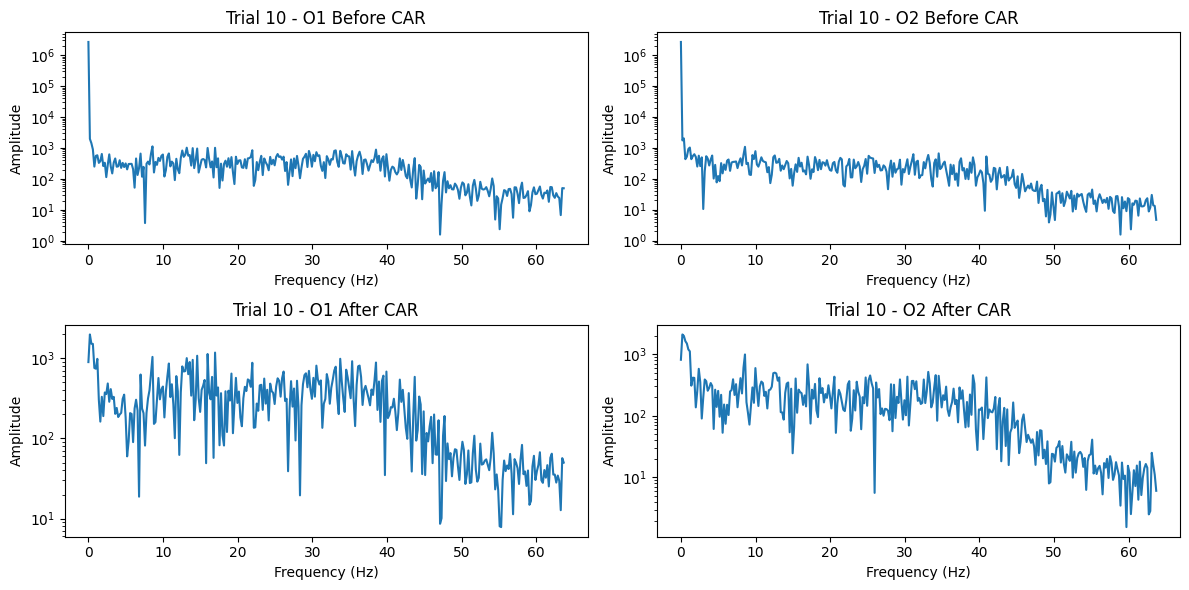

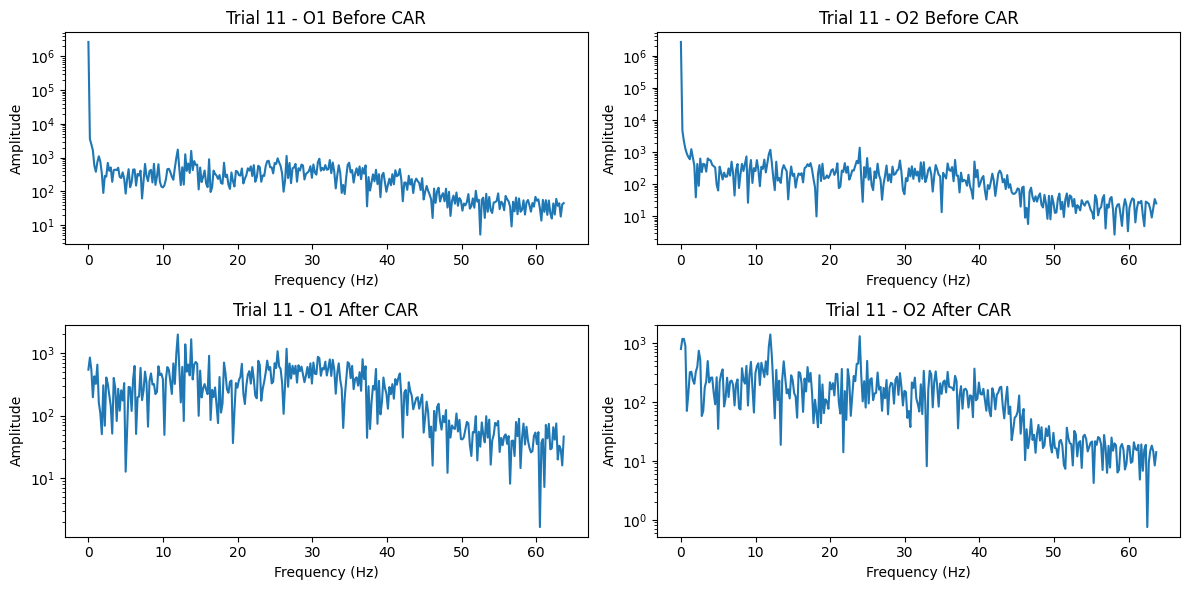

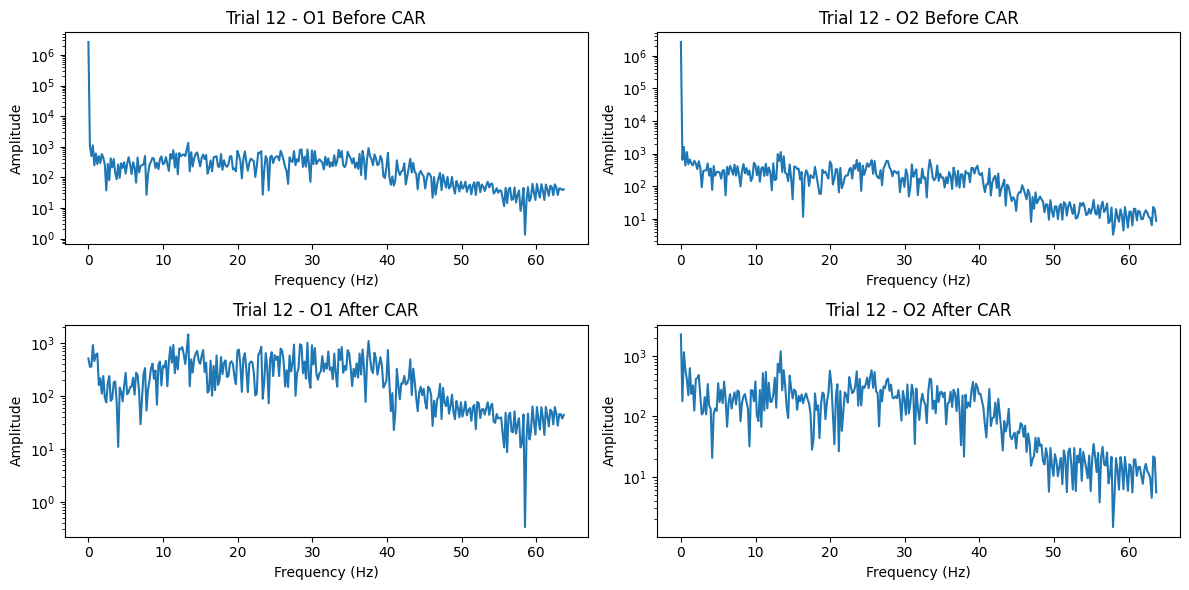

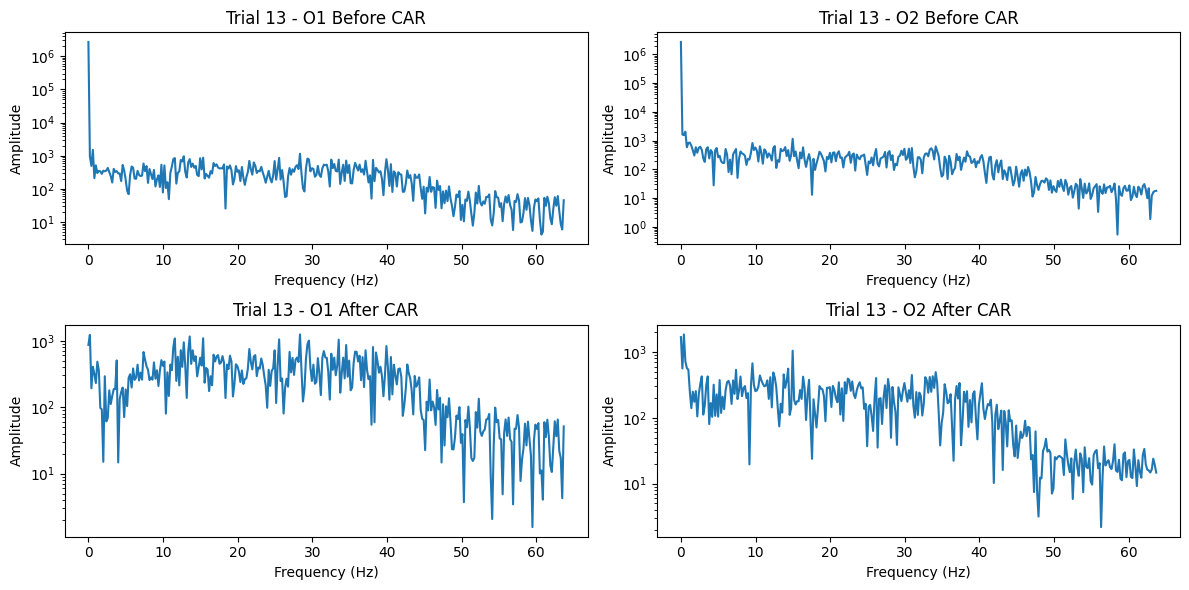

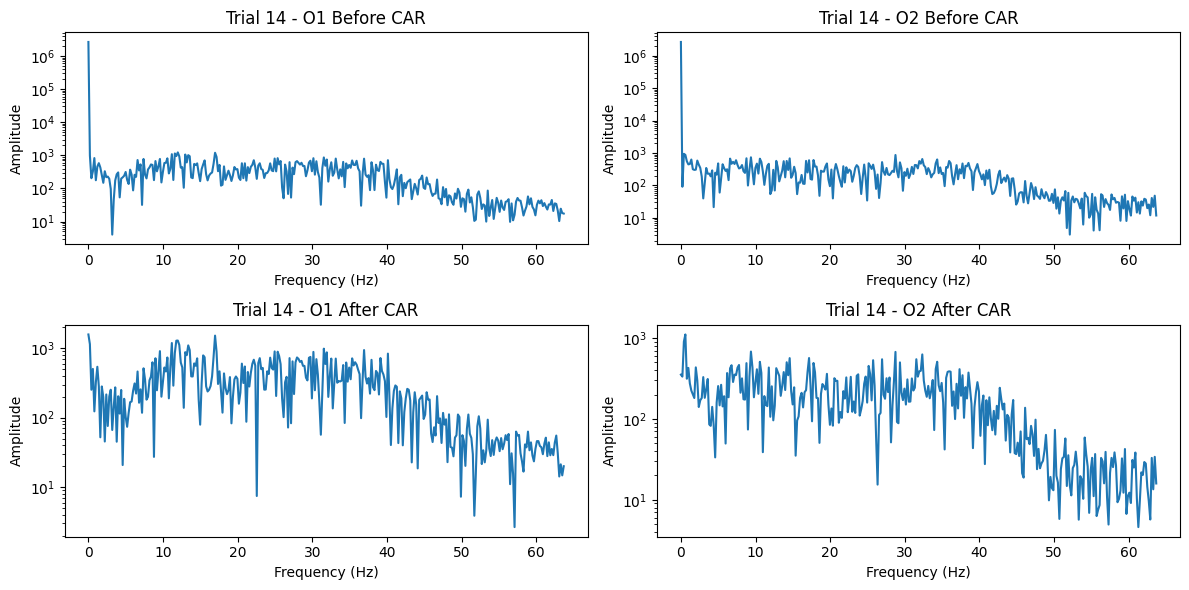

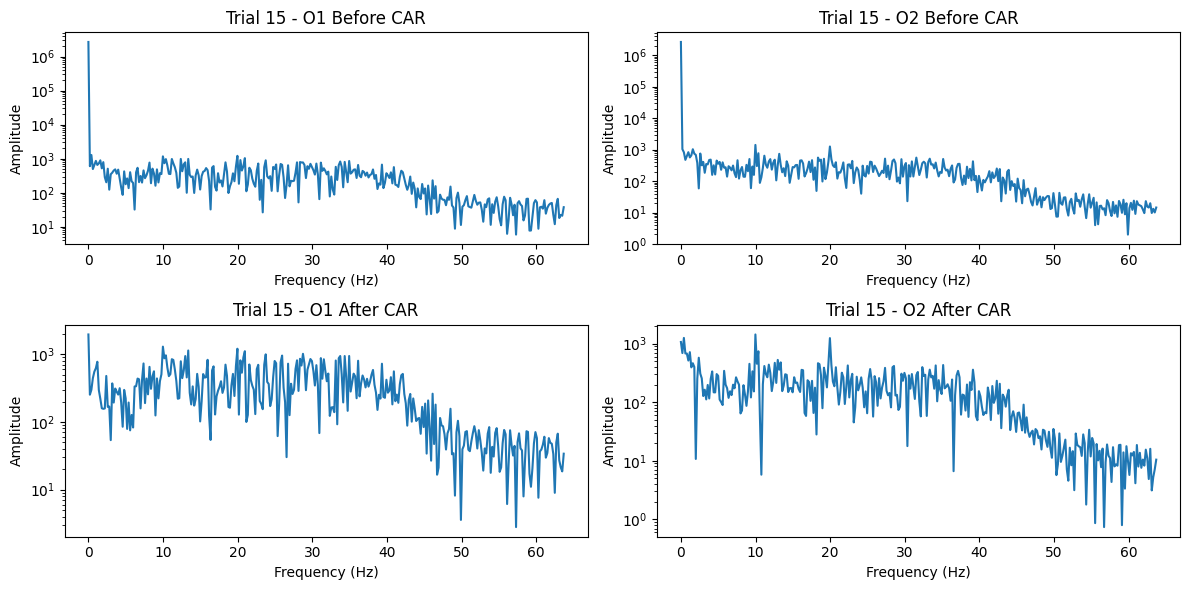

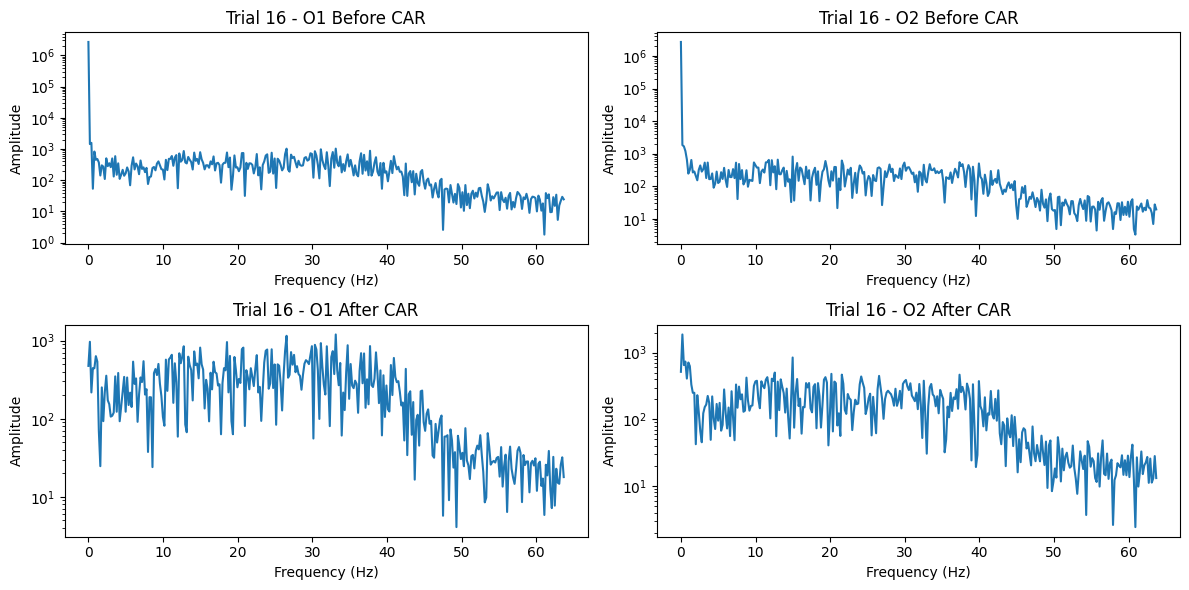

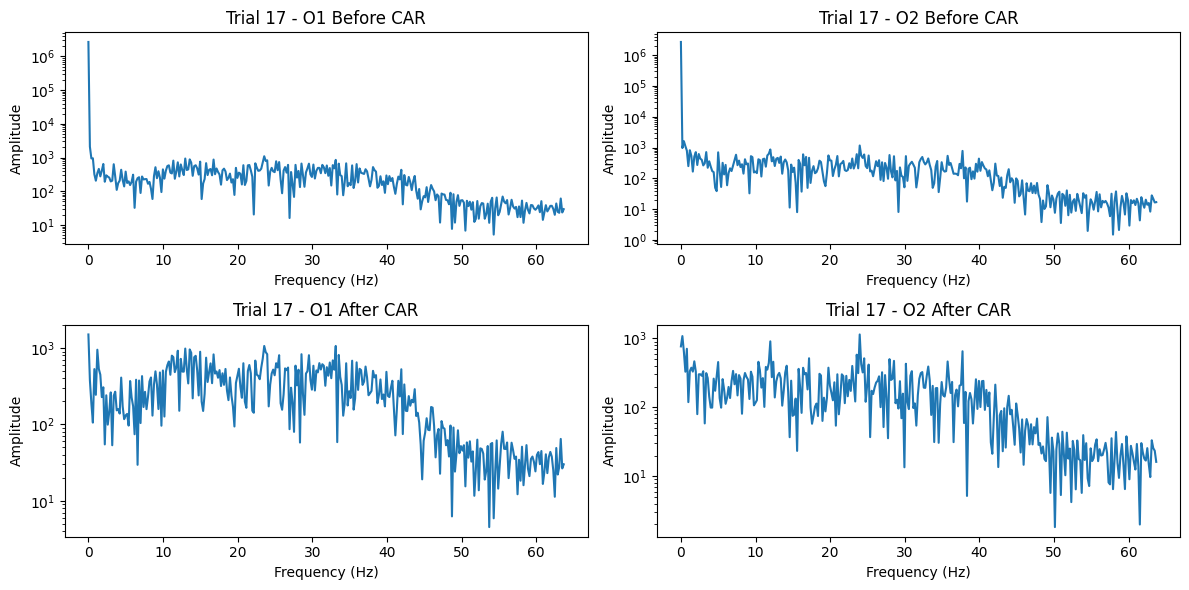

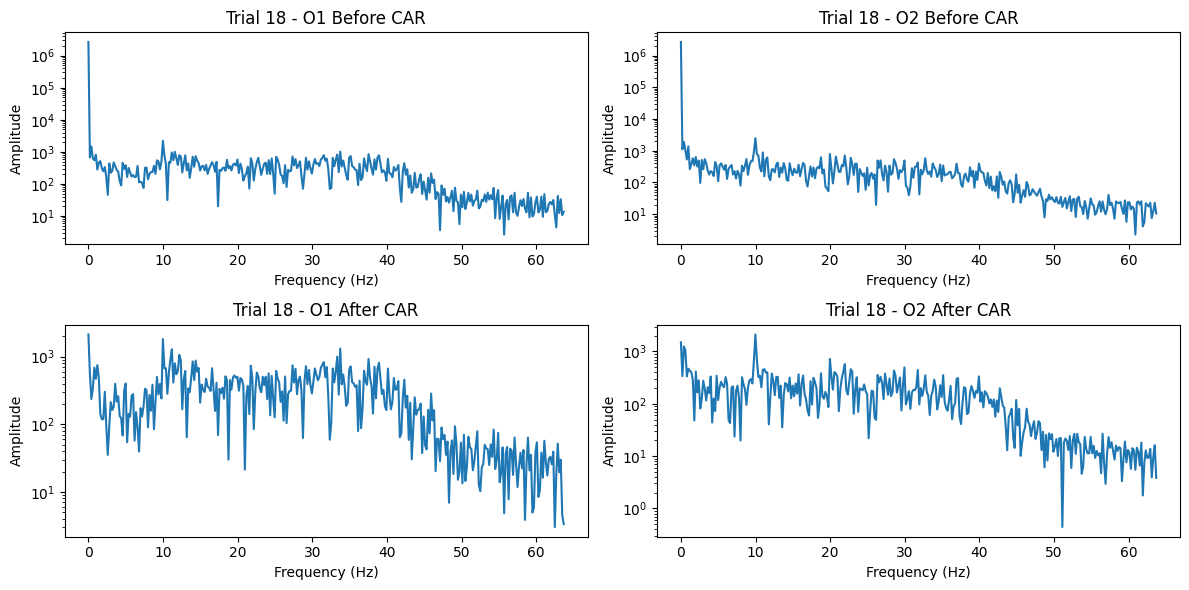

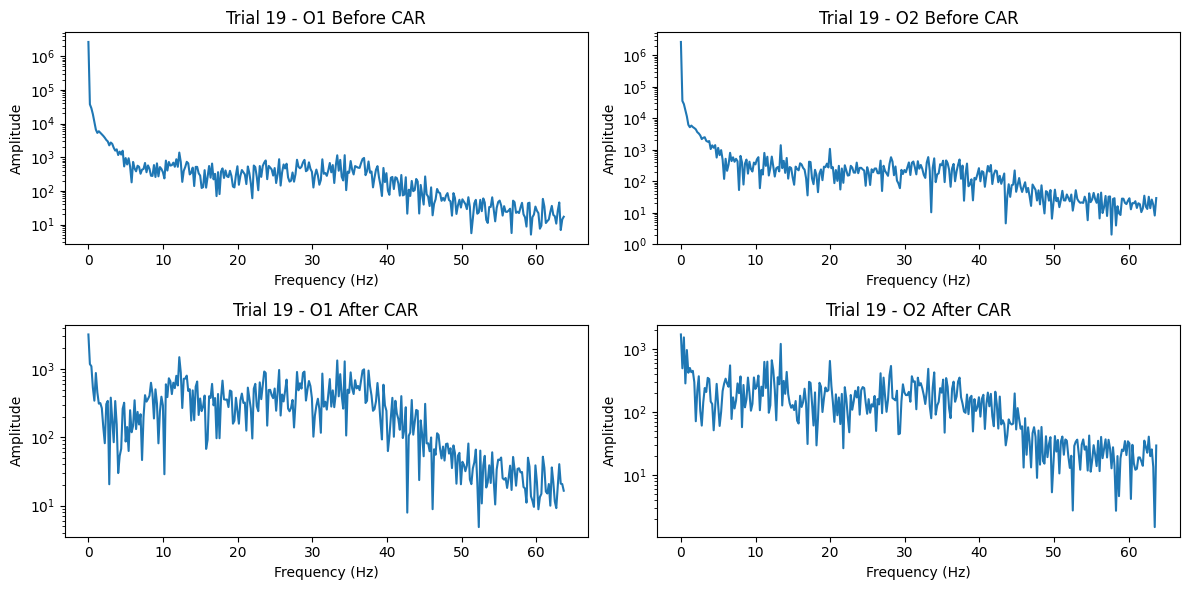

KeyboardInterrupt: 

In [8]:
for i, (start, end) in enumerate(fourrier_transform_ranges['subject1']):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    xf_O1, yf_O1 = freq_ampl_before_CAR['O1'][i]
    plt.plot(xf_O1, yf_O1)
    plt.title(f'Trial {i+1} - O1 Before CAR')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.yscale('log')

    plt.subplot(2, 2, 2)
    xf_O2, yf_O2 = freq_ampl_before_CAR['O2'][i]
    plt.plot(xf_O2, yf_O2)
    plt.title(f'Trial {i+1} - O2 Before CAR')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    xf_O1_CAR, yf_O1_CAR = freq_ampl_after_CAR['subject1_O1'][i]
    plt.plot(xf_O1_CAR, yf_O1_CAR)
    plt.title(f'Trial {i+1} - O1 After CAR')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.yscale('log')

    plt.subplot(2, 2, 4)
    xf_O2_CAR, yf_O2_CAR = freq_ampl_after_CAR['subject1_O2'][i]
    plt.plot(xf_O2_CAR, yf_O2_CAR)
    plt.title(f'Trial {i+1} - O2 After CAR')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

In [9]:
stimulus_guess ={'subject1_O1':[],
                 'subject1_O2':[],
                 'subject2_O1':[],
                 'subject2_O2':[],
                 'subject1_average':[],
                 'subject2_average':[]}

In [10]:
window_size = 0
stimulus1_freqbin_range = (60-window_size,61+window_size)
stimulus2_freqbin_range = (50-window_size,51+window_size)
stimulus3_freqbin_range = (43-window_size,44+window_size)
stimulus4_freqbin_range = (38-window_size,39+window_size)
stimulus5_freqbin_range = (33-window_size,34+window_size)
for xf, yf in freq_ampl_after_CAR['subject1_O1']:
    average_val_to_index = {}
    stimulus1 = yf[stimulus1_freqbin_range[0]:stimulus1_freqbin_range[1]].mean()
    stimulus2 = yf[stimulus2_freqbin_range[0]:stimulus2_freqbin_range[1]].mean()
    stimulus3 = yf[stimulus3_freqbin_range[0]:stimulus3_freqbin_range[1]].mean()
    stimulus4 = yf[stimulus4_freqbin_range[0]:stimulus4_freqbin_range[1]].mean()
    stimulus5 = yf[stimulus5_freqbin_range[0]:stimulus5_freqbin_range[1]].mean()
    average_val_to_index[stimulus1] = 1
    average_val_to_index[stimulus2] = 2
    average_val_to_index[stimulus3] = 3
    average_val_to_index[stimulus4] = 4
    average_val_to_index[stimulus5] = 5
    arr = sorted(average_val_to_index.items(), reverse=True)
    stimulus_guess['subject1_O1'].append(arr[0][1])
for xf, yf in freq_ampl_after_CAR['subject1_O2']:
    average_val_to_index = {}
    stimulus1 = yf[stimulus1_freqbin_range[0]:stimulus1_freqbin_range[1]].mean()
    stimulus2 = yf[stimulus2_freqbin_range[0]:stimulus2_freqbin_range[1]].mean()
    stimulus3 = yf[stimulus3_freqbin_range[0]:stimulus3_freqbin_range[1]].mean()
    stimulus4 = yf[stimulus4_freqbin_range[0]:stimulus4_freqbin_range[1]].mean()
    stimulus5 = yf[stimulus5_freqbin_range[0]:stimulus5_freqbin_range[1]].mean()
    average_val_to_index[stimulus1] = 1
    average_val_to_index[stimulus2] = 2
    average_val_to_index[stimulus3] = 3
    average_val_to_index[stimulus4] = 4
    average_val_to_index[stimulus5] = 5
    arr = sorted(average_val_to_index.items(), reverse=True)
    stimulus_guess['subject1_O2'].append(arr[0][1])
for xf, yf in freq_ampl_after_CAR['subject2_O1']:
    average_val_to_index = {}
    stimulus1 = yf[stimulus1_freqbin_range[0]:stimulus1_freqbin_range[1]].mean()
    stimulus2 = yf[stimulus2_freqbin_range[0]:stimulus2_freqbin_range[1]].mean()
    stimulus3 = yf[stimulus3_freqbin_range[0]:stimulus3_freqbin_range[1]].mean()
    stimulus4 = yf[stimulus4_freqbin_range[0]:stimulus4_freqbin_range[1]].mean()
    stimulus5 = yf[stimulus5_freqbin_range[0]:stimulus5_freqbin_range[1]].mean()
    average_val_to_index[stimulus1] = 1
    average_val_to_index[stimulus2] = 2
    average_val_to_index[stimulus3] = 3
    average_val_to_index[stimulus4] = 4
    average_val_to_index[stimulus5] = 5
    arr = sorted(average_val_to_index.items(), reverse=True)
    stimulus_guess['subject2_O1'].append(arr[0][1])
for xf, yf in freq_ampl_after_CAR['subject2_O2']:
    average_val_to_index = {}
    stimulus1 = yf[stimulus1_freqbin_range[0]:stimulus1_freqbin_range[1]].mean()
    stimulus2 = yf[stimulus2_freqbin_range[0]:stimulus2_freqbin_range[1]].mean()
    stimulus3 = yf[stimulus3_freqbin_range[0]:stimulus3_freqbin_range[1]].mean()
    stimulus4 = yf[stimulus4_freqbin_range[0]:stimulus4_freqbin_range[1]].mean()
    stimulus5 = yf[stimulus5_freqbin_range[0]:stimulus5_freqbin_range[1]].mean()
    average_val_to_index[stimulus1] = 1
    average_val_to_index[stimulus2] = 2
    average_val_to_index[stimulus3] = 3
    average_val_to_index[stimulus4] = 4
    average_val_to_index[stimulus5] = 5
    arr = sorted(average_val_to_index.items(), reverse=True)
    stimulus_guess['subject2_O2'].append(arr[0][1])
for xf, yf in freq_ampl_after_CAR['subject1_average']:
    average_val_to_index = {}
    stimulus1 = yf[stimulus1_freqbin_range[0]:stimulus1_freqbin_range[1]].mean()
    stimulus2 = yf[stimulus2_freqbin_range[0]:stimulus2_freqbin_range[1]].mean()
    stimulus3 = yf[stimulus3_freqbin_range[0]:stimulus3_freqbin_range[1]].mean()
    stimulus4 = yf[stimulus4_freqbin_range[0]:stimulus4_freqbin_range[1]].mean()
    stimulus5 = yf[stimulus5_freqbin_range[0]:stimulus5_freqbin_range[1]].mean()
    average_val_to_index[stimulus1] = 1
    average_val_to_index[stimulus2] = 2
    average_val_to_index[stimulus3] = 3
    average_val_to_index[stimulus4] = 4
    average_val_to_index[stimulus5] = 5
    arr = sorted(average_val_to_index.items(), reverse=True)
    stimulus_guess['subject1_average'].append(arr[0][1])
for xf, yf in freq_ampl_after_CAR['subject2_average']:
    average_val_to_index = {}
    stimulus1 = yf[stimulus1_freqbin_range[0]:stimulus1_freqbin_range[1]].mean()
    stimulus2 = yf[stimulus2_freqbin_range[0]:stimulus2_freqbin_range[1]].mean()
    stimulus3 = yf[stimulus3_freqbin_range[0]:stimulus3_freqbin_range[1]].mean()
    stimulus4 = yf[stimulus4_freqbin_range[0]:stimulus4_freqbin_range[1]].mean()
    stimulus5 = yf[stimulus5_freqbin_range[0]:stimulus5_freqbin_range[1]].mean()
    average_val_to_index[stimulus1] = 1
    average_val_to_index[stimulus2] = 2
    average_val_to_index[stimulus3] = 3
    average_val_to_index[stimulus4] = 4
    average_val_to_index[stimulus5] = 5
    arr = sorted(average_val_to_index.items(), reverse=True)
    stimulus_guess['subject2_average'].append(arr[0][1])

In [11]:
correct = {'subject1_O1':0,
           'subject1_O2':0,
           'subject2_O1':0,
           'subject2_O2':0,
           'subject1_average':0,
           'subject2_average':0}
percent = {'subject1_O1':0,
           'subject1_O2':0,
           'subject2_O1':0,
           'subject2_O2':0,
           'subject1_average':0,
           'subject2_average':0}
for i in range(len(stimulus_guess['subject1_O1'])):
    if stimulus_actual_values['subject1'][i] == stimulus_guess['subject1_O1'][i]:
        correct['subject1_O1'] += 1
    if stimulus_actual_values['subject1'][i] == stimulus_guess['subject1_O2'][i]:
        correct['subject1_O2'] += 1
    if stimulus_actual_values['subject2'][i] == stimulus_guess['subject2_O1'][i]:
        correct['subject2_O1'] += 1
    if stimulus_actual_values['subject2'][i] == stimulus_guess['subject2_O2'][i]:
        correct['subject2_O2'] += 1
    if stimulus_actual_values['subject1'][i] == stimulus_guess['subject1_average'][i]:
        correct['subject1_average'] += 1
    if stimulus_actual_values['subject2'][i] == stimulus_guess['subject2_average'][i]:
        correct['subject2_average'] += 1
percent['subject1_O1'] = correct['subject1_O1']/125
percent['subject1_O2'] = correct['subject1_O2']/125
percent['subject2_O1'] = correct['subject2_O1']/125
percent['subject2_O2'] = correct['subject2_O2']/125
percent['subject1_average'] = correct['subject1_average']/125
percent['subject2_average'] = correct['subject2_average']/125
print(f'Percent Accuracy:\nSubject 1 O1: {percent["subject1_O1"]*100:0.2f}%\nSubject 1 O2: {percent["subject1_O2"]*100:0.2f}%\nSubject 2 O1: {percent["subject2_O1"]*100:0.2f}%\nSubject 2 O2: {percent["subject2_O2"]*100:0.2f}%\nSubject 1 Combined: {percent["subject1_average"]*100:0.2f}%\nSubject 2 Combined: {percent["subject2_average"]*100:0.2f}%')

Percent Accuracy:
Subject 1 O1: 56.80%
Subject 1 O2: 71.20%
Subject 2 O1: 52.80%
Subject 2 O2: 77.60%
Subject 1 Combined: 64.00%
Subject 2 Combined: 70.40%


In [12]:
def prepare_features(freq_ampl_data):
    features = []
    for xf, yf in freq_ampl_data:
        features.append(yf[20:120])
    return np.array(features)

X_subject1_O1 = prepare_features(freq_ampl_after_CAR['subject1_O1'])
X_subject1_O2 = prepare_features(freq_ampl_after_CAR['subject1_O2'])
X_subject2_O1 = prepare_features(freq_ampl_after_CAR['subject2_O1'])
X_subject2_O2 = prepare_features(freq_ampl_after_CAR['subject2_O2'])

y_subject1 = np.array(stimulus_actual_values['subject1'])
y_subject2 = np.array(stimulus_actual_values['subject2'])

def train_and_evaluate_knn_loo(X, y):
    loo = LeaveOneOut()
    accuracies = []

    for n_neighbors in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        correct_predictions = 0
        total_predictions = 0

        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            correct_predictions += (y_pred == y_test).sum()
            total_predictions += len(y_test)

        accuracy = correct_predictions / total_predictions
        accuracies.append((n_neighbors, accuracy))
    
    best_n_neighbors, best_accuracy = max(accuracies, key=lambda item: item[1])
    return best_n_neighbors, best_accuracy, accuracies

best_n_subject1_O1, best_acc_subject1_O1, acc_subject1_O1 = train_and_evaluate_knn_loo(X_subject1_O1, y_subject1)
best_n_subject1_O2, best_acc_subject1_O2, acc_subject1_O2 = train_and_evaluate_knn_loo(X_subject1_O2, y_subject1)
best_n_subject2_O1, best_acc_subject2_O1, acc_subject2_O1 = train_and_evaluate_knn_loo(X_subject2_O1, y_subject2)
best_n_subject2_O2, best_acc_subject2_O2, acc_subject2_O2 = train_and_evaluate_knn_loo(X_subject2_O2, y_subject2)

print(f"Best n_neighbors for Subject 1, Electrode O1: {best_n_subject1_O1} with accuracy {best_acc_subject1_O1}")
print(f"Best n_neighbors for Subject 1, Electrode O2: {best_n_subject1_O2} with accuracy {best_acc_subject1_O2}")
print(f"Best n_neighbors for Subject 2, Electrode O1: {best_n_subject2_O1} with accuracy {best_acc_subject2_O1}")
print(f"Best n_neighbors for Subject 2, Electrode O2: {best_n_subject2_O2} with accuracy {best_acc_subject2_O2}")

Best n_neighbors for Subject 1, Electrode O1: 4 with accuracy 0.568
Best n_neighbors for Subject 1, Electrode O2: 7 with accuracy 0.904
Best n_neighbors for Subject 2, Electrode O1: 21 with accuracy 0.464
Best n_neighbors for Subject 2, Electrode O2: 7 with accuracy 0.928


In [13]:
def prepare_features_averaged(freq_ampl_data1, freq_ampl_data2):
    features = []
    for (xf1, yf1), (xf2, yf2) in zip(freq_ampl_data1, freq_ampl_data2):
        avg_yf = (yf1[20:120] + yf2[20:120]) / 2
        features.append(avg_yf)
    return np.array(features)

X_subject1_avg = prepare_features_averaged(freq_ampl_after_CAR['subject1_O1'], freq_ampl_after_CAR['subject1_O2'])
X_subject2_avg = prepare_features_averaged(freq_ampl_after_CAR['subject2_O1'], freq_ampl_after_CAR['subject2_O2'])

y_subject1 = np.array(stimulus_actual_values['subject1'])
y_subject2 = np.array(stimulus_actual_values['subject2'])

def train_and_evaluate_knn_loo(X, y):
    loo = LeaveOneOut()
    accuracies = []

    for n_neighbors in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        correct_predictions = 0
        total_predictions = 0

        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            correct_predictions += (y_pred == y_test).sum()
            total_predictions += len(y_test)

        accuracy = correct_predictions / total_predictions
        accuracies.append((n_neighbors, accuracy))
    
    best_n_neighbors, best_accuracy = max(accuracies, key=lambda item: item[1])
    return best_n_neighbors, best_accuracy, accuracies

best_n_subject1_avg, best_acc_subject1_avg, acc_subject1_avg = train_and_evaluate_knn_loo(X_subject1_avg, y_subject1)
best_n_subject2_avg, best_acc_subject2_avg, acc_subject2_avg = train_and_evaluate_knn_loo(X_subject2_avg, y_subject2)

print(f"Best n_neighbors for Subject 1 (averaged): {best_n_subject1_avg} with accuracy {best_acc_subject1_avg}")
print(f"Best n_neighbors for Subject 2 (averaged): {best_n_subject2_avg} with accuracy {best_acc_subject2_avg}")


Best n_neighbors for Subject 1 (averaged): 8 with accuracy 0.84
Best n_neighbors for Subject 2 (averaged): 1 with accuracy 0.88


In [14]:
electrode_indices = {
    'AF3': 0, 'F7': 1, 'F3': 2, 'FC5': 3, 'T7': 4, 'P7': 5, 'O1': 6, 'O2': 7,
    'P8': 8, 'T8': 9, 'FC6': 10, 'F4': 11, 'F8': 12, 'AF4': 13
}

def prepare_combined_features(subject, ranges):
    combined_features = []
    for start, end in ranges:
        combined_stimulus_data = []
        for electrode in electrode_indices.values():
            stimulus_data = EEG_after_CAR[subject].iloc[electrode, start:end].to_numpy()
            xf, yf = compute_fft(stimulus_data)
            combined_stimulus_data.extend(yf[20:120])
        combined_features.append(combined_stimulus_data)
    return np.array(combined_features)

X_subject1 = prepare_combined_features('subject1', fourrier_transform_ranges['subject1'])
y_subject1 = np.array(stimulus_actual_values['subject1'])

X_subject2 = prepare_combined_features('subject2', fourrier_transform_ranges['subject2'])
y_subject2 = np.array(stimulus_actual_values['subject2'])

def train_and_evaluate_knn_loo(X, y):
    loo = LeaveOneOut()
    accuracies = []

    for n_neighbors in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        correct_predictions = 0
        total_predictions = 0

        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            correct_predictions += (y_pred == y_test).sum()
            total_predictions += len(y_test)

        accuracy = correct_predictions / total_predictions
        accuracies.append((n_neighbors, accuracy))
    
    best_n_neighbors, best_accuracy = max(accuracies, key=lambda item: item[1])
    return best_n_neighbors, best_accuracy, accuracies

best_n_subject1, best_acc_subject1, acc_subject1 = train_and_evaluate_knn_loo(X_subject1, y_subject1)
best_n_subject2, best_acc_subject2, acc_subject2 = train_and_evaluate_knn_loo(X_subject2, y_subject2)

print(f"Best n_neighbors for Subject 1: {best_n_subject1} with accuracy {best_acc_subject1}")
print(f"Best n_neighbors for Subject 2: {best_n_subject2} with accuracy {best_acc_subject2}")

Best n_neighbors for Subject 1: 29 with accuracy 0.792
Best n_neighbors for Subject 2: 25 with accuracy 0.688
